# Advanced Data Structures and Algorithms
By Dr. [Uzay Cetin](https://uzay00.github.io/kahve/)

 - Course for CMPE 232 @ Bilgi University
 - Python Implementations of Graph Algorithms

Go to our Book's web site: https://algs4.cs.princeton.edu/lectures/

In [1]:
import warnings
warnings.filterwarnings('ignore')

from queue import Queue 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class node():
    def __init__(self, name):
        self.name = name 
        self.visited = False
        self.prev = None
        self.id = None # Component ID
        self.neighbors = []   # List of references to adjacent nodes (not node names)

In [3]:
class Graph():
    def __init__(self, edge_list):
        self.edge_list = edge_list
        self.create_nodes()
        self.create_graph() # create edges
        
    def create_nodes(self):
        # Get node names from edge_list and remove duplicates
        self.node_names = list(set([s for s,t in self.edge_list]
                                   +[t for s,t in self.edge_list]))
        # create nodes, store in a dictionary
        self.nodes = {n:node(n) for n in self.node_names}
        
    def create_graph(self):
        for edge in self.edge_list:
            self.add_edge(edge)
            
    def add_edge(self, edge):
        s,t = edge
        self.nodes[s].neighbors.append(self.nodes[t]) # in neighbor list I have nodes (not names)
        self.nodes[t].neighbors.append(self.nodes[s])

In [4]:
def draw(g, node_name = None, pos_fr = None, color = 'lightgreen', display = True):
    G = nx.Graph()
    G.add_edges_from(g.edge_list)
    
    if pos_fr: pos_fr = pos_fr
    else: pos_fr = nx.fruchterman_reingold_layout(G)
    
    marked = [name for name, node in g.nodes.items() if node.visited]
    non_marked = [name for name, node in g.nodes.items() if not node.visited]
    
    fig = plt.figure(figsize=(10,10))
    # Plot node labels
    nx.draw_networkx_labels(G, pos=pos_fr)
    # Plot nodes
    nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=marked, 
                           node_size=600, font_size= 30, node_color='pink')
    nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=non_marked, 
                           node_size=300, font_size= 30, node_color='lightblue')
    # Plot edges 
    nx.draw_networkx_edges(G, pos=pos_fr, width=2)
    if node_name:  plt.savefig(f'figures/iter{node_name}.png')
    if not display: plt.close(fig)
        
    return pos_fr

## Connected Component

In [5]:
class DFS():   
    """
    - Mark v = Node[s_name] as visited
    - recursively visit all unmarked neighbors
    """
    def __init__(self, G):
        self.G = G
        self.traversal = []
        self.pos_fr = draw(self.G) # inital position
        
    def dfs(self, s_name):
        self.G.nodes[s_name].visited = True
        self.traversal.append(s_name)
        draw(self.G, s_name,  pos_fr = self.pos_fr, display= False) # using same position
        
        for t in self.G.nodes[s_name].neighbors: # t is node (not node name)
            if not t.visited: # all unmarked neighbors
                t.prev = s_name
                self.dfs(t.name) # recursive visit

In [16]:
class CC():   
    def __init__(self, G):
        self.G = G
        self.traversal = []
        self.pos_fr = draw(self.G) # inital position
        
    def CC(self):
        cid = 0
        for v_name, v in self.G.nodes.items():
            if v.id == None:
                self.dfs(s_name = v_name, cid = cid)
                cid += 1
                
    def dfs(self, s_name, cid):
        self.G.nodes[s_name].visited = True
        self.G.nodes[s_name].id = cid
        self.traversal.append(s_name)
        draw(self.G, s_name,  pos_fr = self.pos_fr, display= False) # using same position
        
        for t in self.G.nodes[s_name].neighbors: # t is node (not node name)
            if not t.visited: # all unmarked neighbors
                t.prev = s_name
                self.dfs(t.name, cid) # recursive visit

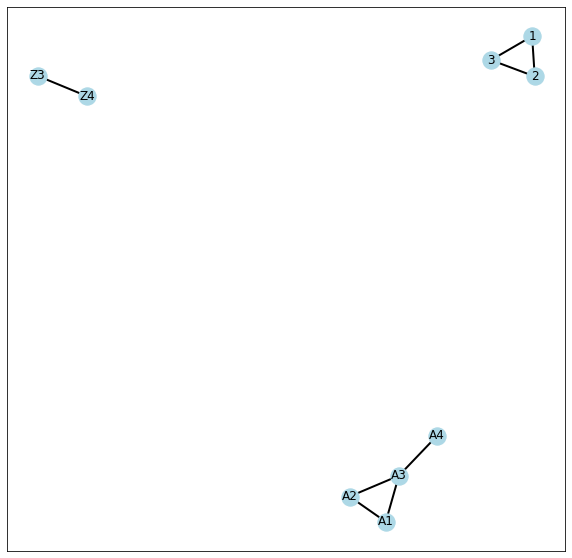

In [17]:
# list of tuples (s,t)
edge_list = [('A1', 'A2'), ('A2', 'A3'), ('A3', 'A4'), ('A1', 'A3'),  
             (1,2),(2,3),(1,3),
            ('Z3','Z4')]
g = Graph(edge_list)
cc = CC(g)
cc.CC()

In [14]:
{v.name: v.id for v in cc.G.nodes.values()}

{1: 0, 2: 0, 3: 0, 'A4': 1, 'Z3': 2, 'A1': 1, 'A3': 1, 'Z4': 2, 'A2': 1}

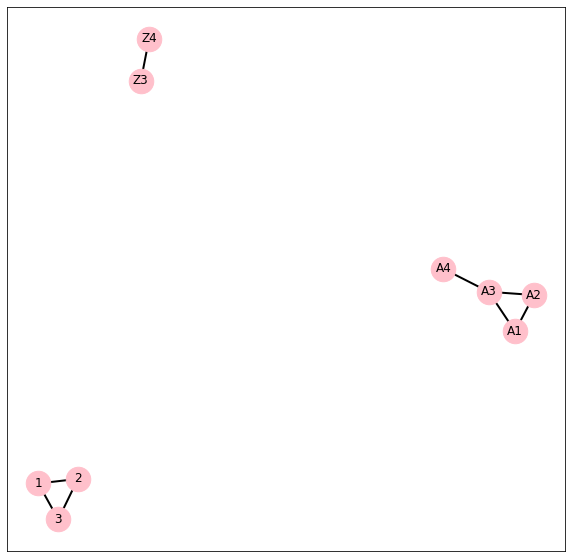

In [15]:
pos = draw(g)